# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5386    False
5387    False
5388    False
5389    False
5390    False
Length: 5391, dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.strip('$')
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace(',','')

data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.strip('$')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace(',','')

data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.strip('$')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace(',','')


In [46]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

In [47]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [48]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [49]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [78]:
 data['USD_Worldwide_Gross'].quantile(0.25)

3865206.0

In [87]:
bottom_25_rev = data[data['USD_Worldwide_Gross'] <= data['USD_Worldwide_Gross'].quantile(0.25)]
bottom_25_rev['USD_Worldwide_Gross'].max()
bottom_25_rev = bottom_25_rev[bottom_25_rev['USD_Worldwide_Gross'] == bottom_25_rev['USD_Worldwide_Gross'].max()]
bottom_25_rev['USD_Worldwide_Gross'].iloc[0]
bottom_25_rev['USD_Production_Budget'].iloc[0]

4000000

In [88]:
print(f"average production budget: {data['USD_Production_Budget'].mean()}")
print(f"average worldwide gross revenue: {data['USD_Worldwide_Gross'].mean()}")
print(f"minimums for worldwide and domestic revenue: {data['USD_Worldwide_Gross'].min()} {data['USD_Domestic_Gross'].min()}")
bottom_25_rev = data[data['USD_Worldwide_Gross'] <= data['USD_Worldwide_Gross'].quantile(0.25)]
bottom_25_rev = bottom_25_rev[bottom_25_rev['USD_Worldwide_Gross'] == bottom_25_rev['USD_Worldwide_Gross'].max()]
print(f"bottom 25% of films revenue vs production budget: {bottom_25_rev['USD_Worldwide_Gross'].iloc[0]}  {bottom_25_rev['USD_Production_Budget'].iloc[0]}")
print(f"highest production budget film: {data['Movie_Title'][data['USD_Production_Budget'] == data['USD_Production_Budget'].max()].iloc[0]}")
print(f"highest worldwide gross revenue film: {data['Movie_Title'][data['USD_Production_Budget'] == data['USD_Production_Budget'].max()].iloc[0]}")
print(f"revenue of lowest budget film: {data['USD_Worldwide_Gross'][data['USD_Production_Budget'] == data['USD_Production_Budget'].min()].iloc[0]}")
print(f"revenue of highest budget film: {data['USD_Worldwide_Gross'][data['USD_Production_Budget'] == data['USD_Production_Budget'].max()].iloc[0]}")

average production budget: 31113737.57837136
average worldwide gross revenue: 88855421.96271564
minimums for worldwide and domestic revenue: 0 0
bottom 25% of films revenue vs production budget: 3858964  4000000
highest production budget film: Avatar
highest worldwide gross revenue film: Avatar
revenue of lowest budget film: 181041
revenue of highest budget film: 2783918982


In [104]:
data[data['USD_Production_Budget'] == data['USD_Production_Budget'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [94]:
data['Movie_Title'][data['USD_Domestic_Gross'] == 0].count()

512

In [101]:
zero_domestic_grossing_films = data[data['USD_Domestic_Gross'] == 0]
zero_domestic_grossing_films[zero_domestic_grossing_films['USD_Production_Budget'] == zero_domestic_grossing_films['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [102]:
data['Movie_Title'][data['USD_Worldwide_Gross'] == 0].count()

357

In [103]:
zero_worldwide_grossing_films = data[data['USD_Worldwide_Gross'] == 0]
zero_worldwide_grossing_films[zero_worldwide_grossing_films['USD_Production_Budget'] == zero_worldwide_grossing_films['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


### Filtering on Multiple Conditions

In [108]:
internation_films = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross > 0")

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [109]:
internation_films['Movie_Title'].count()

155

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [110]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [115]:
data_clean = data[data['Release_Date'] <= scrape_date]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5384 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.4+ KB


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [121]:
money_lossing_films = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_lossing_films['Movie_Title'].count() / data['Movie_Title'].count()

0.3722871452420701

# Seaborn for Data Viz: Bubble Charts

/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

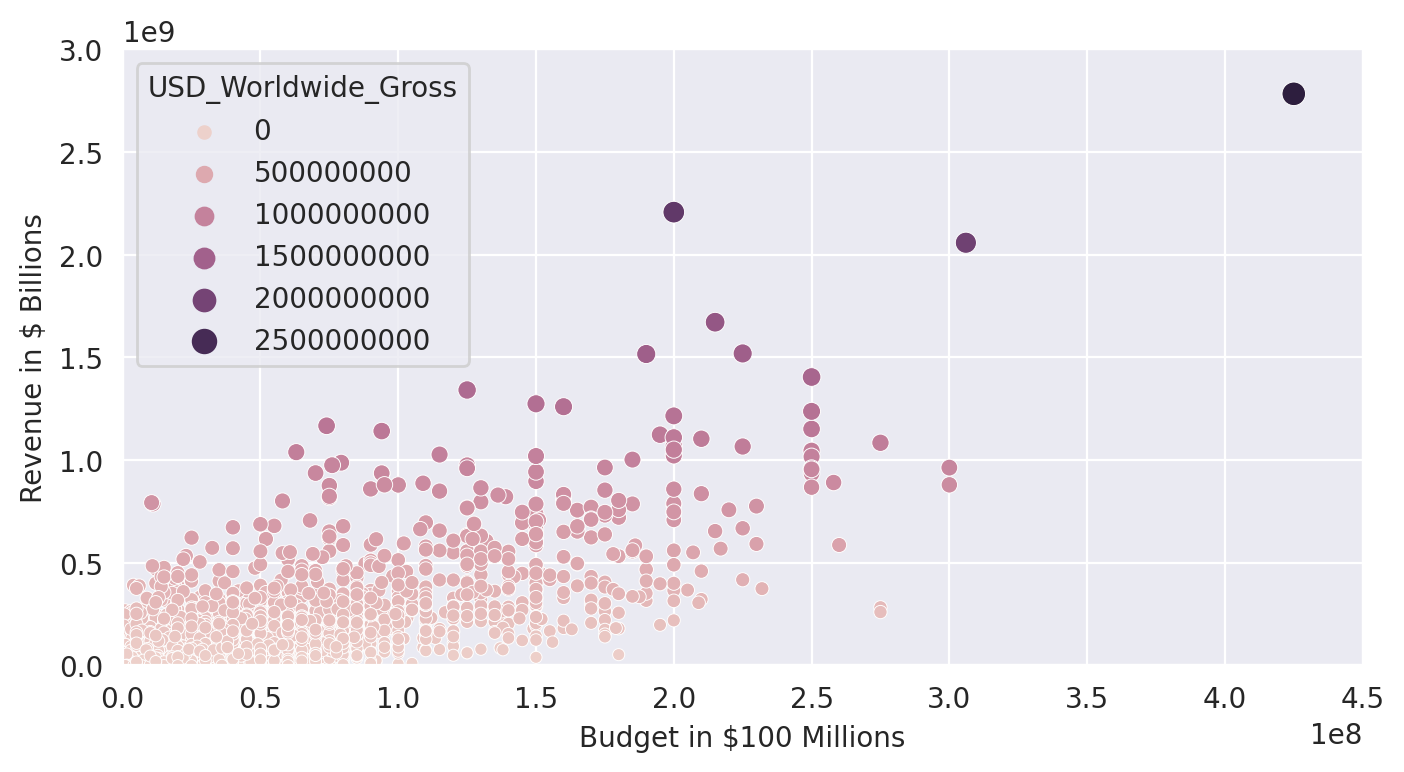

In [128]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')
    ax.set(ylim=(0, 3000000000), xlim=(0,450000000), xlabel='Budget in $100 Millions', ylabel='Revenue in $ Billions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

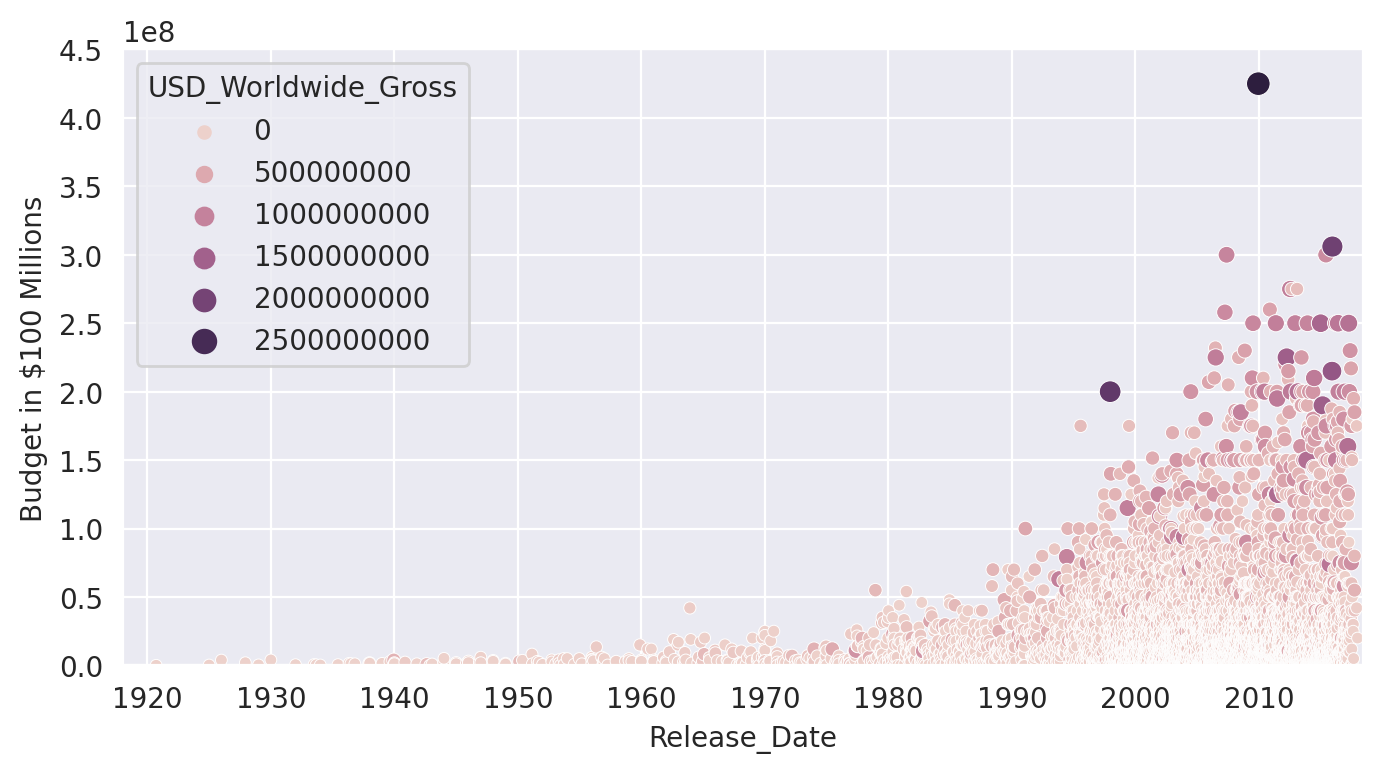

In [137]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data_clean, x='Release_Date', y='USD_Production_Budget', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')
    ax.set(ylim=(0, 450000000), xlim=(pd.Timestamp('1918-1-1'),pd.Timestamp('2018-6-1')), ylabel='Budget in $100 Millions', xlabel='Release_Date')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [138]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [140]:
ts = data_clean['Release_Date'].iloc[0]

In [144]:
(ts.year // 10) * 10

1910

In [145]:
ts.year

1915

In [148]:
data_clean['Decade'] = (data_clean['Release_Date'].dt.year // 10) * 10

/var/folders/91/bc1s7yq104z_xqw7fd4xx2kh0000gn/T/ipykernel_62376/3847369692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = (data_clean['Release_Date'].dt.year // 10) * 10


In [150]:
data_clean.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [151]:
old_films = data_clean[data_clean['Decade'] < 1970]
new_films = data_clean[data_clean['Decade'] >= 1970]
print(f'Number of old films: {len(old_films)}  Number of new films: {len(new_films)}')

Number of old films: 153  Number of new films: 5231


In [154]:
print(f"The most expensive film made prior to 1970: {old_films['Movie_Title'][old_films['USD_Production_Budget'] == old_films['USD_Production_Budget'].max()].iloc[0]}")

The most expensive film made prior to 1970: Cleopatra


# Seaborn Regression Plots

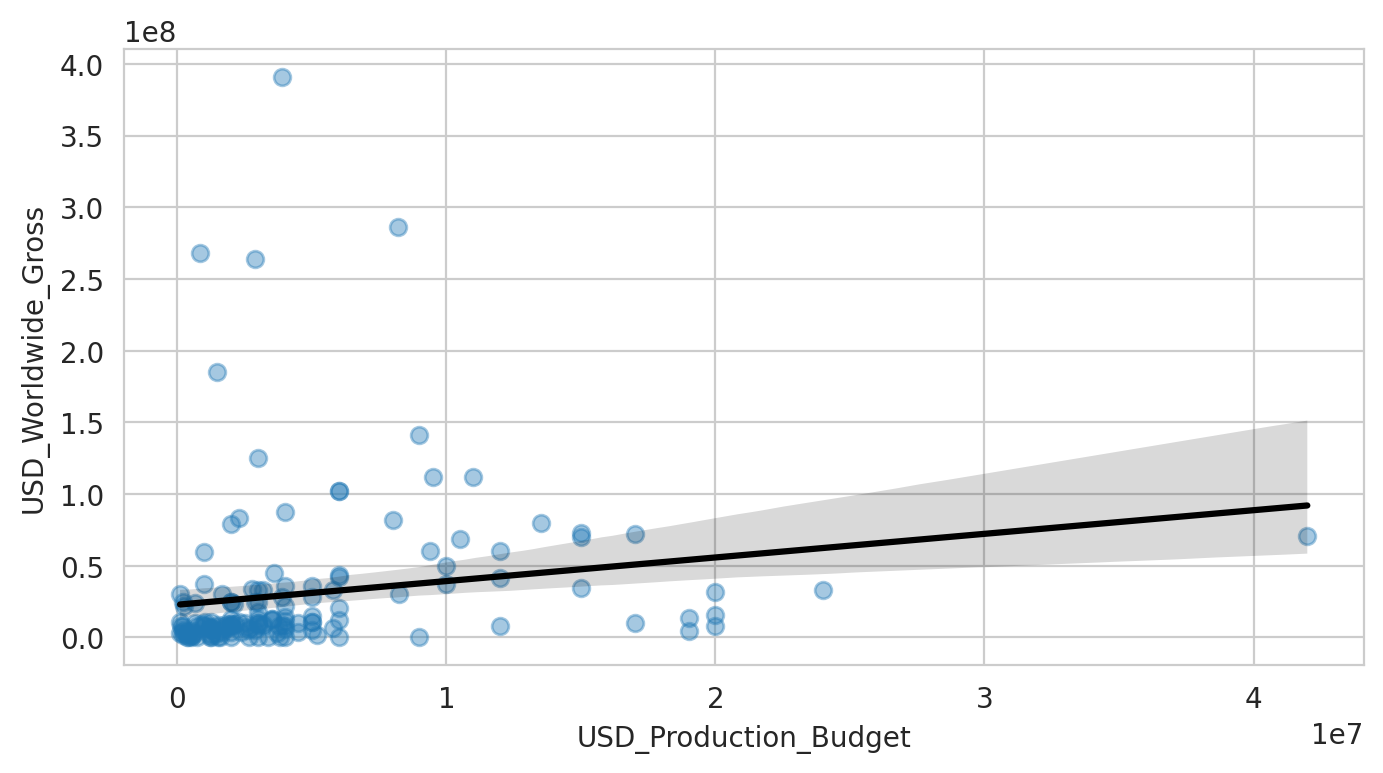

In [156]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films, 
                x="USD_Production_Budget", 
                y="USD_Worldwide_Gross",
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

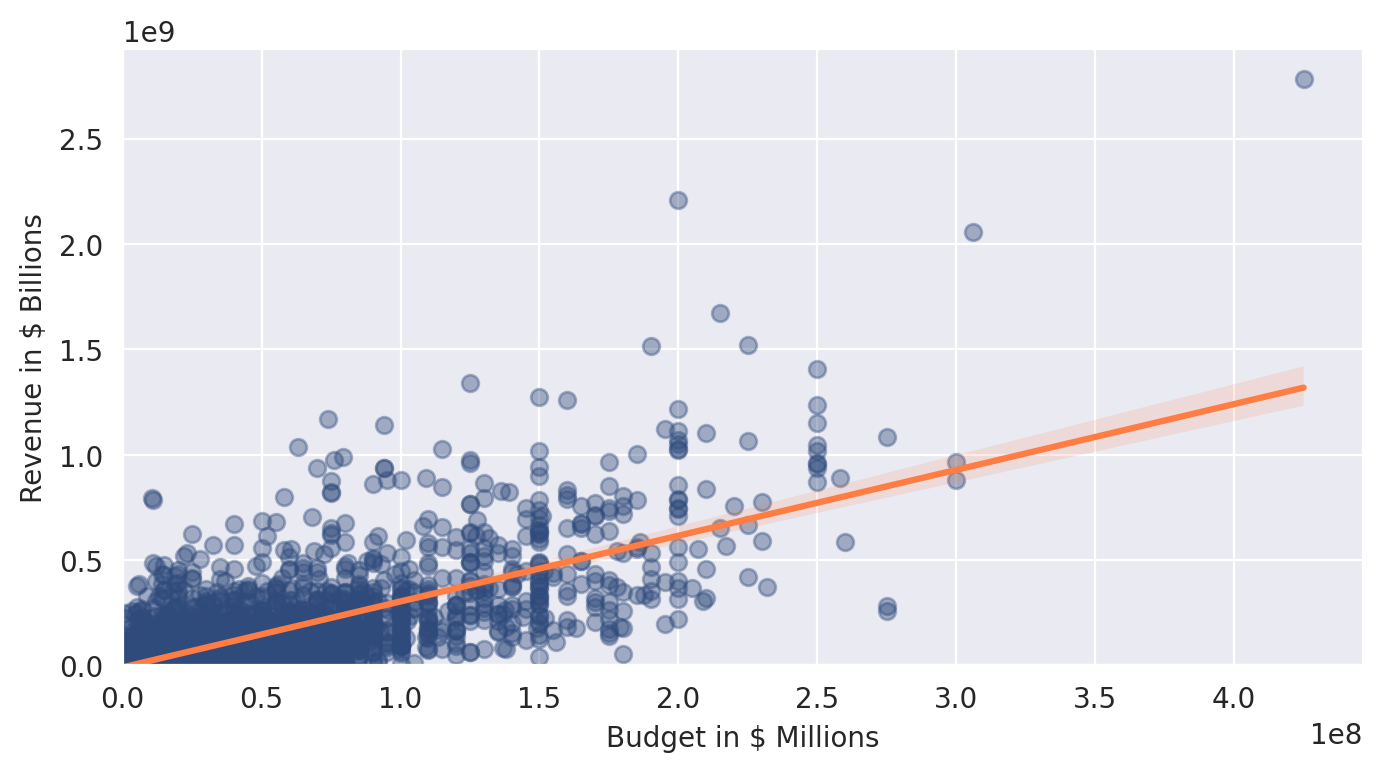

In [164]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    rg = sns.regplot(data=new_films, 
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                scatter_kws={'alpha': 0.4, 'color': '#2f4b7c'},
                line_kws={'color': '#ff7c43'})
    rg.set(xlabel='Budget in $ Millions', ylabel='Revenue in $ Billions', 
           xlim=(0,new_films['USD_Production_Budget'].max()*1.05), ylim=(0,new_films['USD_Worldwide_Gross'].max()*1.05))
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'regression intercept: {regression.intercept_}')
print(f'regression coeff: {regression.coef_}')
print(f'R-squared score: {regression.score(X, y)}')
regression.predict(np.array([350000000]))

regression intercept: [-8650768.00661024]
regression coeff: [[3.12259592]]
R-squared score: 0.5577032617720403


/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [170]:
regression = LinearRegression()
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'regression intercept: {regression.intercept_}')
print(f'regression coeff: {regression.coef_}')
print(f'R-squared score: {regression.score(X, y)}')
predicted_y = regression.predict(np.array([[350000000]]))
print(predicted_y)

regression intercept: [22821538.63508038]
regression coeff: [[1.64771314]]
R-squared score: 0.02937258620576877
[[5.99521139e+08]]


/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [169]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'regression intercept: {regression.intercept_}')
print(f'regression coeff: {regression.coef_}')
print(f'R-squared score: {regression.score(X, y)}')
import numpy as np
predicted_y = regression.predict(np.array([[350000000]]))
print(predicted_y)

regression intercept: [-8650768.00661024]
regression coeff: [[3.12259592]]
R-squared score: 0.5577032617720403
[[1.0842578e+09]]


/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta